In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models, losses
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape, Conv2D, Conv2DTranspose, InputLayer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

# Problem 1

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def img_to_16_patches(images):
    num_images = images.shape[0]
    patches = images.reshape(num_images, 4, 7, 4, 7).transpose(0, 1, 3, 2, 4)
    patches = patches.reshape(num_images, 16, 49)
    return patches

In [4]:
x_train_patches = img_to_16_patches(x_train)
x_test_patches = img_to_16_patches(x_test)

In [5]:
print(x_train_patches.shape)
print(x_test_patches.shape)

(60000, 16, 49)
(10000, 16, 49)


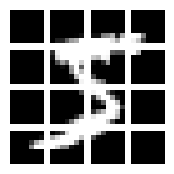

In [6]:
fig, axs = plt.subplots(4, 4, figsize=(2,2))
for i in range(4):
    for j in range(4):
        patch_idx = i * 4 + j
        patch = x_train_patches[0][patch_idx].reshape(7, 7)
        axs[i, j].imshow(patch, cmap='gray')
        axs[i, j].axis('off')
plt.show()

In [7]:
x_train_model = x_train_patches[:, :-1, :]
y_train_model = x_train_patches[:, 1:, :]
x_test_model = x_test_patches[:, :-1, :]
y_test_model = x_test_patches[:, 1:, :]

In [8]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(None, 49)),
    tf.keras.layers.LSTM(256, return_sequences=True, kernel_initializer='glorot_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(256, return_sequences=True, kernel_initializer='glorot_normal'),
    tf.keras.layers.LSTM(64, return_sequences=True, kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(49, activation='sigmoid', kernel_initializer='glorot_normal')
])

model1.compile(optimizer='adam', loss='mean_squared_error')
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 256)      │       313,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, None, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 256)      │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, None, 64)       │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, None, 49)       │         3,185 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 924,017 (3.52 MB)

 Trainable params: 924,017 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model1_history = model1.fit(x_train_model,
                            y_train_model,
                            validation_data=(x_test_model, y_test_model),
                            batch_size=500,
                            epochs=100)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.1451 - val_loss: 0.1017
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0983 - val_loss: 0.0964
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0943 - val_loss: 0.0935
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0913 - val_loss: 0.0901
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0883 - val_loss: 0.0881
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0866 - val_loss: 0.0863
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0844 - val_loss: 0.0789
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0753 - val_loss: 0.0701
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0690 - val_loss: 0.0648
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0635 - val_loss: 0.0590
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0587 - val_loss: 0.0554
Epoch 12/100
120/120 ━━━━━━━━━

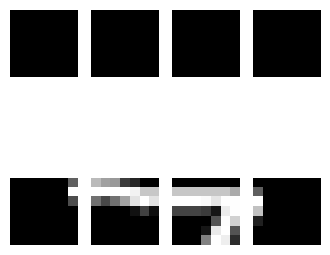

In [24]:
sample_test_patches = x_test_patches[0][:8]

fig, axes = plt.subplots(2, 4, figsize=(4, 4))
for i in range(2):
    for j in range(4):
        patch_idx = i * 4 + j
        patch = sample_test_patches[patch_idx].reshape(7, 7)
        axes[i, j].imshow(patch, cmap='gray')
        axes[i, j].axis('off')
plt.show()

In [25]:
generated_patches = sample_test_patches.reshape(1, 8, 49).copy()
for _ in range(8):
    next_patch = model1.predict(generated_patches)
    generated_patches = np.concatenate((generated_patches, next_patch[:, -1:, :]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
generated_bottom_half_patches = generated_patches[0, 8:, :].reshape(8, 49)

In [27]:
selected_top_patches = x_test_patches[0][:8]

In [28]:
def predict_bottom_half(model, upper_patches):
    combined_patches = upper_patches.copy()
    for step in range(8):
        next_predicted_patch = model.predict(combined_patches)
        combined_patches = np.concatenate((combined_patches, next_predicted_patch[:, -1:, :]), axis=1)
    return combined_patches[0, 8:, :].reshape(8, 49)

def rebuild_image_from_patches(patch_list):
    reconstructed_img = np.zeros((28, 28))
    current_patch = 0
    for x in range(0, 28, 7):
        for y in range(0, 28, 7):
            reconstructed_img[x:x+7, y:y+7] = patch_list[current_patch].reshape(7, 7)
            current_patch += 1
    return reconstructed_img

def combine_and_rebuild_image(upper_patches, lower_patches):
    reshaped_upper = upper_patches.reshape(-1, 49)
    all_patches = np.vstack([reshaped_upper, lower_patches])
    return rebuild_image_from_patches(all_patches)

def show_reconstruction(original, reconstructed, img_idx):
    fig, axes = plt.subplots(1, 2, figsize=(4, 2))
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title(f"Original Image {img_idx}")
    axes[0].axis('off')

    axes[1].imshow(reconstructed, cmap='gray')
    axes[1].set_title(f"Reconstructed Image {img_idx}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

def plot_image_grid(image_set, grid_title="Images", color_map='gray'):
    fig, grid_axes = plt.subplots(10, 10, figsize=(10, 10))
    fig.suptitle(grid_title, fontsize=16)
    for row in range(10):
        for col in range(10):
            img_index = row * 10 + col
            grid_axes[row, col].imshow(image_set[img_index], cmap=color_map)
            grid_axes[row, col].axis('off')
    plt.show()

In [29]:
generated_bottom_patches = predict_bottom_half(model1, selected_top_patches.reshape(1, 8, 49))
full_reconstructed_image = combine_and_rebuild_image(selected_top_patches, generated_bottom_patches)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


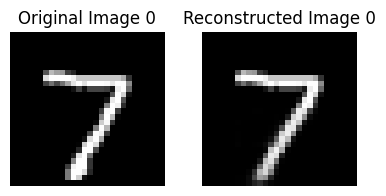

In [30]:
true_image = x_test[0]
show_reconstruction(true_image, full_reconstructed_image, 0)

In [48]:
y_test_original_labels = np.argmax(y_test, axis=1)

In [51]:
example_indices = []
for label in range(10):
    digit_indices = np.where(y_test_original_labels == label)[0][:10]
    example_indices.extend(digit_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

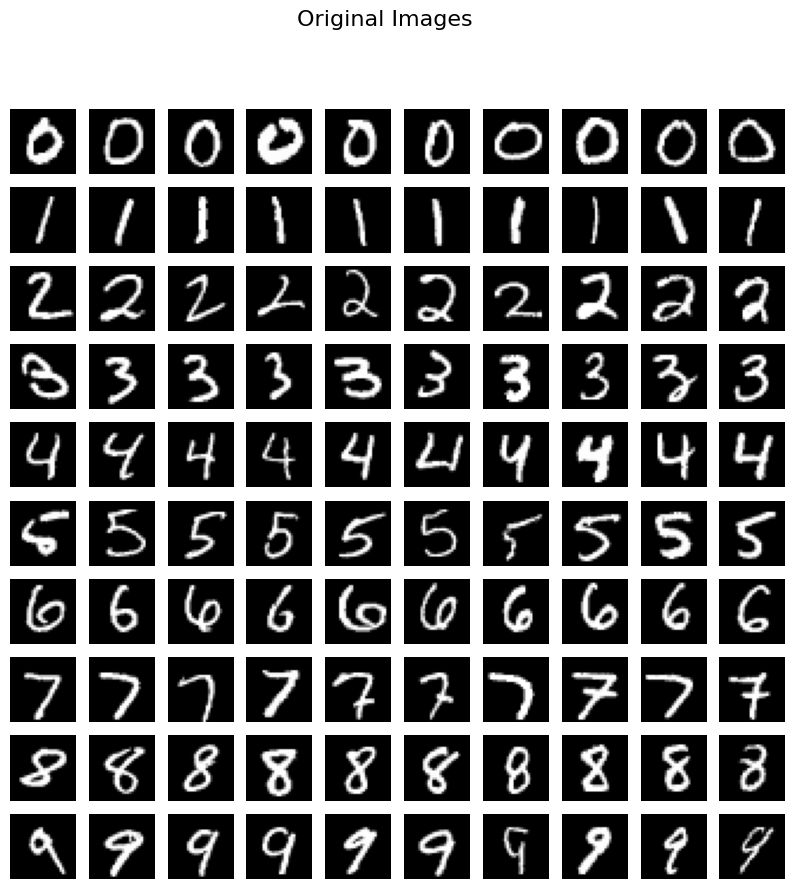

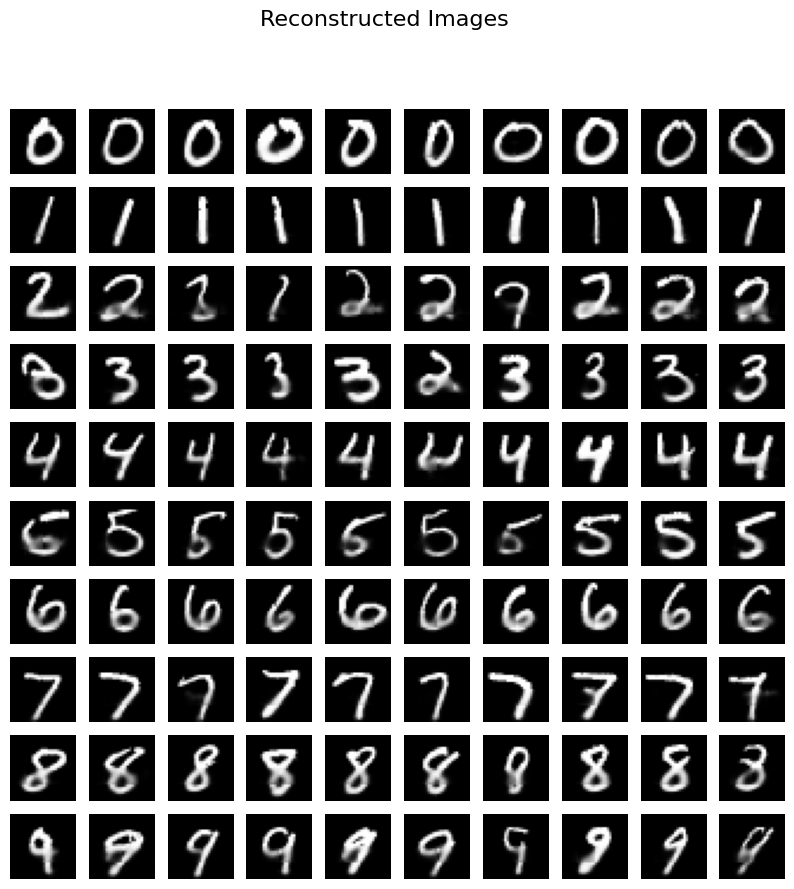

In [52]:
original_set = []
reconstructed_set = []
for example in example_indices:
    true_image = x_test[example]
    original_set.append(true_image)

    upper_patches = x_test_patches[example][:8].reshape(1, 8, 49)
    lower_patches = predict_bottom_half(model1, upper_patches)
    full_image = combine_and_rebuild_image(upper_patches, lower_patches)
    reconstructed_set.append(full_image)

plot_image_grid(original_set, grid_title="Original Images")
plot_image_grid(reconstructed_set, grid_title="Reconstructed Images")

# Problem 2

In [100]:
with open('/kaggle/input/dls-assignment4-data/hw5_tr7.pkl', 'rb') as file:
    train_data = pickle.load(file)
print(train_data.shape)

with open('/kaggle/input/dls-assignment4-data/hw5_te7.pkl', 'rb') as file:
    test_data = pickle.load(file)
print(test_data.shape)

(6265, 28, 28)
(1028, 28, 28)


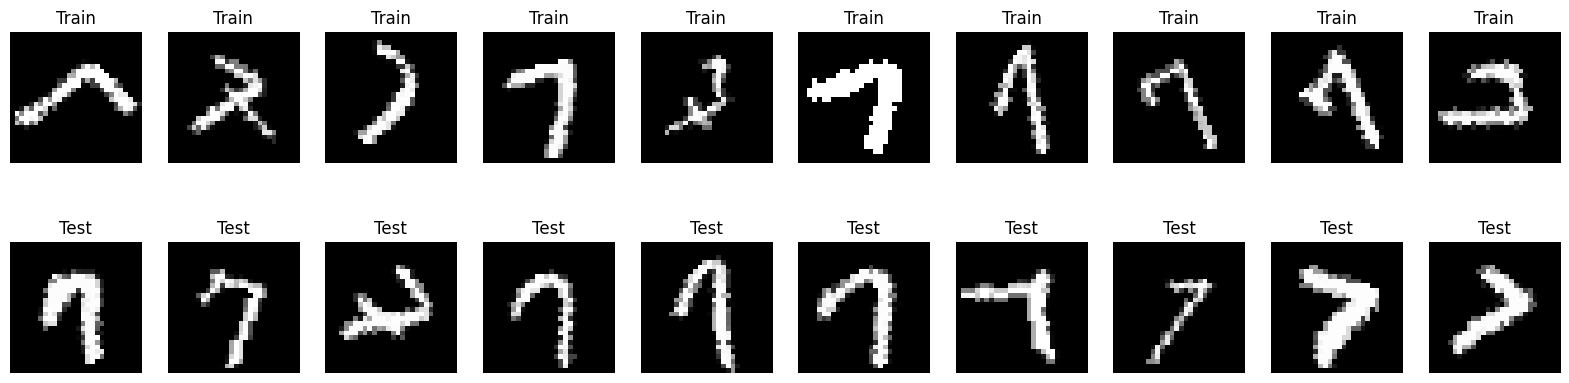

In [101]:
num_images = 10

selected_train_images = train_data[np.random.choice(train_data.shape[0], num_images, replace=False)]
selected_test_images = test_data[np.random.choice(test_data.shape[0], num_images, replace=False)]

fig, axes = plt.subplots(nrows=2, ncols=num_images, figsize=(20, 5))

for i in range(num_images):
    axes[0, i].imshow(selected_train_images[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title("Train")

for i in range(num_images):
    axes[1, i].imshow(selected_test_images[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title("Test")

plt.show()

In [102]:
from tensorflow.keras import layers, models, Input
import tensorflow as tf

latent_dim = 3 # Decided after exploring other dimensions

encoder_input = Input(shape=(28, 28, 1))
x = layers.Flatten()(encoder_input)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)

latent_mean = layers.Dense(latent_dim)(x)
log_variance = layers.Dense(latent_dim)(x)

sampling_layer = layers.Lambda(
    lambda inputs: inputs[0] + tf.exp(0.5 * inputs[1]) * tf.random.normal(tf.shape(inputs[0]))
)([latent_mean, log_variance])

encoder_model = models.Model(inputs=encoder_input, outputs=[latent_mean, log_variance, sampling_layer])
encoder_model.summary()

decoder_input = Input(shape=(latent_dim,))
x = layers.Dense(64, activation="relu")(decoder_input)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(28 * 28, activation="sigmoid")(x)
decoder_output = layers.Reshape((28, 28, 1))(x)

decoder_model = models.Model(inputs=decoder_input, outputs=decoder_output)
decoder_model.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 784)       │          0 │ input_layer_16[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_58 (Dense)    │ (None, 128)       │    100,480 │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_59 (Dense)    │ (None, 64)        │      8,256 │ dense_58[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_60 (Dense)    │ (None, 64)        │      4,160 │ dense_59[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_61 (Dense)    │ (None, 3)         │        195 │ dense_60[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_62 (Dense)    │ (None, 3)         │        195 │ dense_60[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_7 (Lambda)   │ (None, 3)         │          0 │ dense_61[0][0],   │
│                     │                   │            │ dense_62[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 113,286 (442.52 KB)

 Trainable params: 113,286 (442.52 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,872 (444.81 KB)

 Trainable params: 113,872 (444.81 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
class VariationalAutoencoder(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VariationalAutoencoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        with tf.GradientTape() as tape:
            mean, log_var, latent_sample = self.encoder(data)
            reconstruction = self.decoder(latent_sample)

            reconstruction_loss = tf.reduce_mean(
                tf.keras.losses.binary_crossentropy(data, reconstruction)) * 28 * 28

            kl_loss = -0.5 * tf.reduce_mean(
                1 + log_var - tf.square(mean) - tf.exp(log_var))

            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

In [104]:
train_data = train_data[..., None]
test_data = test_data[..., None] 

In [105]:
model2 = VariationalAutoencoder(encoder_model, decoder_model)
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))
model2_history = model2.fit(train_data, 
                            epochs=300, 
                            batch_size=128, 
                            shuffle=True)

Epoch 1/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - kl_loss: 10.3530 - loss: 393.2844 - reconstruction_loss: 382.9314
Epoch 2/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 4.8914 - loss: 205.0674 - reconstruction_loss: 200.1760
Epoch 3/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 2.8040 - loss: 194.1804 - reconstruction_loss: 191.3763
Epoch 4/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 2.2769 - loss: 187.0296 - reconstruction_loss: 184.7527
Epoch 5/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 3.0288 - loss: 171.8252 - reconstruction_loss: 168.7964
Epoch 6/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 2.7463 - loss: 167.0444 - reconstruction_loss: 164.2981
Epoch 7/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 2.5719 - loss: 165.5460 - reconstruction_loss: 162.9741
Epoch 8/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 2.5038 - loss: 164.2081 - reconstruction_loss: 161.7043
Epoch 9/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - k

In [106]:
model2_history.history.keys()

dict_keys(['kl_loss', 'loss', 'reconstruction_loss'])

In [107]:
latent_representation = encoder_model.predict(test_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step 


In [108]:
gen_img_0 = decoder_model.predict(latent_representation[0]).reshape(-1, 28, 28)
gen_img_1 = decoder_model.predict(latent_representation[1]).reshape(-1, 28, 28)
gen_img_2 = decoder_model.predict(latent_representation[2]).reshape(-1, 28, 28)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


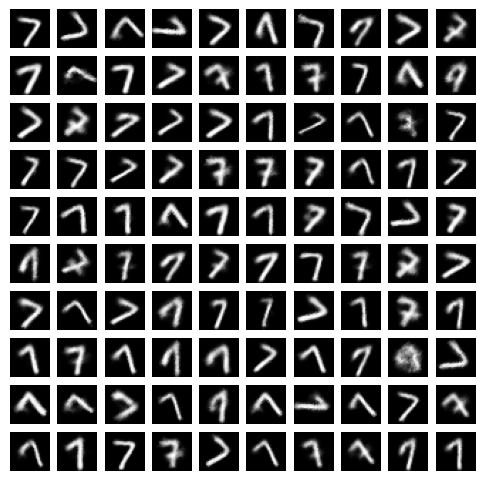

In [109]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for i in range(100):
    r, c = divmod(i, 10)
    axes[r, c].imshow(gen_img_0[i], cmap='gray')
    axes[r, c].axis('off')
plt.show()

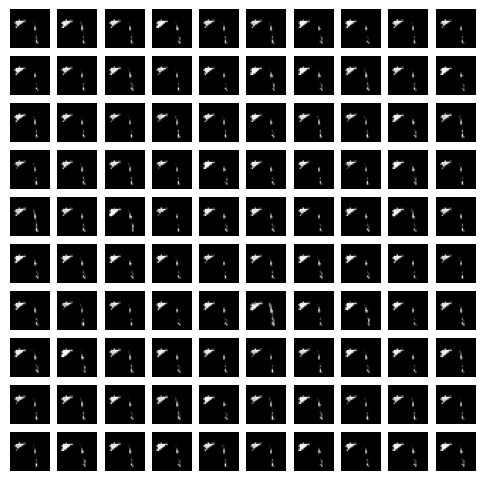

In [110]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for i in range(100):
    r, c = divmod(i, 10)
    axes[r, c].imshow(gen_img_1[i], cmap='gray')
    axes[r, c].axis('off')
plt.show()

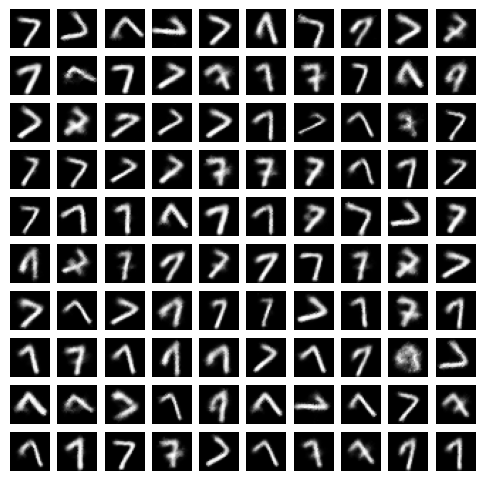

In [111]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for i in range(100):
    r, c = divmod(i, 10)
    axes[r, c].imshow(gen_img_2[i], cmap='gray')
    axes[r, c].axis('off')
plt.show()